In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def haar_1d_directe(n,u):
    v = np.copy(u)
    s = (2.0)
    w = np.zeros((n))
    m = n
    while 1 < m :
        m = (m//2)
        w[0:m] = (v[0:2*m-1:2] + v[1:2*m:2]) / s
        w[m:2*m] = (v[0:2*m-1:2] - v[1:2*m:2]) / s
        v[0:2*m] = w[0:2*m]
    return v

def haar_1d_inverse(n,u):
    v = np.copy(u)
    w = np.zeros((n))
    m = 1
    while (m*2 <= n):
        w[0:2*m-1:2] = v[0:m] + v[m:2*m] 
        w[1:2*m:2]  = v[0:m] - v[m:2*m]
        v[0:2*m] = w[0:2*m]
        m=2*m        
    return v

In [431]:
def quadHaar_1d_directe(x):
    n = len(x)
    v = np.copy(x)
    res = np.zeros((n))
    m = n
    while 1 < m :
      m = (m//2)
      w = np.zeros((m))
      w[0:m] = (v[0:2*m-1:2] + v[1:2*m:2]) / 2
      w2 = np.copy(w)
      if m == 1:
        w[0] = w[0] - v[0]
        res[m:m*2] = w[0:m]
      else :
        w[1:m-1] = (w2[1:m-1] - (w2[0:m-2] - w2[2:m])/8)
        w[0] = (w2[0] - (w2[m-1] - w2[1])/8) 
        w[m-1] = (w2[m-1] - (w2[m-2] - w2[0])/8) 
        w[0:m] = w[0:m] - v[0:m*2:2]
        res[m:m*2] = w[0:m]
        v = np.copy(w2)
    res[0] = w2[0] 
    return res

print("EXERCICE 1 direct\n")

tab = (np.array([1,2,3,4,5,6,7,8],float))

haar = quadHaar_1d_directe(tab)
print(haar)
print("\n\n")

EXERCICE 1 direct

[4.5 2.  1.  1.  0.  1.  1.  0. ]





In [0]:
def quadHaar_1d_inverse(x):
    n = 1
    i = 1
    v = np.copy([x[0]]) 
    while(n <= len(x)/2):
        w = np.zeros((n))        
        w2 = np.zeros((n))
        res = np.zeros((n))
        if n == 1 :
            w[0] = v[0]
        else :             
            w[1:n-1] = v[1:n-1] - (v[0:n-2] - v[2:n])/8
            w[0] = v[0] - (v[(n-1)] - v[1])/8
            w[n-1] = (v[n-1] - (v[(n-2)] - v[0])/8)  
        res[0:n] = w[0:n] - x[i:i+n]
        w2[0:n] = 2*v[0:n]-res[0:n]
        res = fusion_alt(res,w2)
        i = i + n
        v = np.copy(res)
        n = len(res)
    return res

def fusion_alt(v1,v2):
    n = len(v1)
    w = np.zeros((2*n))
    for i in range(n):
        w[0:2*n-1:2] = v1[0:n]
        w[1:2*n:2] = v2[0:n]
    return w

In [433]:
print("EXERCICE 1 inverse\n")
haari = quadHaar_1d_inverse(haar)
print(haari)

EXERCICE 1 inverse

[1. 2. 3. 4. 5. 6. 7. 8.]


In [0]:
def ex1(n):
    y = np.zeros((n))
    for i in range(n):
        y[i] = i+1
    #print(y)
    return y

def ex3(n):
    x = np.zeros((n))
    for i in range(int(n/2)):
        x[i] = np.sin((2*np.pi)*i)
    for i in range(int((n/2)+1),n) :
        x[i] = 1/2 + np.sin((2*np.pi)*i) 
    return x

image1 = np.array([43,41,40,39,35,30,100,79,190,192,150,166,131,140,145,161],float)
e1 = ex1(8)
e3 = ex3(8)

In [435]:
print("EXERCICE 2\n")
print('ex1')
print(e1)
print (quadHaar_1d_inverse(quadHaar_1d_directe(e1)))

EXERCICE 2

ex1
[1. 2. 3. 4. 5. 6. 7. 8.]
[1. 2. 3. 4. 5. 6. 7. 8.]


In [436]:
print('\nex2')
print(image1)
print (quadHaar_1d_inverse(quadHaar_1d_directe(image1)))


ex2
[ 43.  41.  40.  39.  35.  30. 100.  79. 190. 192. 150. 166. 131. 140.
 145. 161.]
[ 43.  41.  40.  39.  35.  30. 100.  79. 190. 192. 150. 166. 131. 140.
 145. 161.]


In [437]:
print('\nex3')
print(e3)
print (quadHaar_1d_inverse(quadHaar_1d_directe(e3)))


ex3
[ 0.00000000e+00 -2.44929360e-16 -4.89858720e-16 -7.34788079e-16
  0.00000000e+00  5.00000000e-01  5.00000000e-01  5.00000000e-01]
[ 6.93889390e-18 -2.38725140e-16 -4.85722573e-16 -7.25781112e-16
  0.00000000e+00  5.00000000e-01  5.00000000e-01  5.00000000e-01]


In [0]:
def seuillage(x,T):
    y = np.copy(x)
    for i in range((len(y))):
        if (np.absolute(y[i]) <= T):
            y[i] = 0.0
    return y

In [439]:
print("EXERCICE 3 \n")
taille = 64
e11 = ex1(taille)
e33 = ex3(taille)

print('ex1')
print(e11)
print('Seuil 12')
print (seuillage(quadHaar_1d_directe(e11),12))
print (seuillage(haar_1d_directe(taille,e11),12))
print('Seuil 128')
print (seuillage(quadHaar_1d_directe(e11),128))
print (seuillage(haar_1d_directe(taille,e11),128))

EXERCICE 3 

ex1
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53. 54.
 55. 56. 57. 58. 59. 60. 61. 62. 63. 64.]
Seuil 12
[32.5 16.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0. ]
[ 32.5 -16.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0. ]
Seuil

In [440]:
print('\nex2')
print(image1)
print('Seuil 12')
print (seuillage(quadHaar_1d_directe(image1),12))
print (seuillage(haar_1d_directe(len(image1),image1),12))
print('Seuil 128')
print (seuillage(quadHaar_1d_directe(image1),128))
print (seuillage(haar_1d_directe(len(image1),image1),128))


ex2
[ 43.  41.  40.  39.  35.  30. 100.  79. 190. 192. 150. 166. 131. 140.
 145. 161.]
Seuil 12
[105.125    54.25      0.      -15.125     0.       45.21875   0.
   0.      -15.1875    0.        0.        0.        0.        0.
   0.        0.     ]
[105.125 -54.25    0.     15.125   0.    -28.5    16.5     0.      0.
   0.      0.      0.      0.      0.      0.      0.   ]
Seuil 128
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [441]:
print('\nex3')
print(e33)
print('Seuil 12')
print (seuillage(quadHaar_1d_directe(e33),12))
print (seuillage(haar_1d_directe(taille,e33),12))
print('Seuil 128')
print (seuillage(quadHaar_1d_directe(e33),128))
print (seuillage(haar_1d_directe(taille,e33),128))


ex3
[ 0.00000000e+00 -2.44929360e-16 -4.89858720e-16 -7.34788079e-16
 -9.79717439e-16 -1.22464680e-15 -1.46957616e-15 -1.71450552e-15
 -1.95943488e-15 -2.20436424e-15 -2.44929360e-15 -9.79965032e-15
 -2.93915232e-15  3.92134568e-15 -3.42901104e-15 -1.07793678e-14
 -3.91886976e-15  2.94162824e-15 -4.40872848e-15 -1.17590852e-14
 -4.89858720e-15  1.96191080e-15 -1.95993006e-14 -1.27388026e-14
 -5.87830464e-15  9.82193362e-16  7.84269136e-15 -1.37185201e-14
 -6.85802208e-15  2.47592255e-18 -2.15587355e-14 -1.46982375e-14
  0.00000000e+00  5.00000000e-01  5.00000000e-01  5.00000000e-01
  5.00000000e-01  5.00000000e-01  5.00000000e-01  5.00000000e-01
  5.00000000e-01  5.00000000e-01  5.00000000e-01  5.00000000e-01
  5.00000000e-01  5.00000000e-01  5.00000000e-01  5.00000000e-01
  5.00000000e-01  5.00000000e-01  5.00000000e-01  5.00000000e-01
  5.00000000e-01  5.00000000e-01  5.00000000e-01  5.00000000e-01
  5.00000000e-01  5.00000000e-01  5.00000000e-01  5.00000000e-01
  5.00000000e-01  5.

In [442]:
def erreur(a,b):
    n = len(a)
    s = 0
    for i in range(n):
        s = s + np.square(np.absolute(a[i]-b[i]))
    s = np.sqrt(s)
    return s

print("\nEXERCICE 4\n")



EXERCICE 4



In [443]:
print('ex1')
print('T=12')
print('QuadHaar')
print (erreur(e11,quadHaar_1d_inverse(seuillage(e11,12))))
print('Haar')
print (erreur(e11,haar_1d_inverse(taille,seuillage(e11,12))))
print('T=128')
print('QuadHaar')
print (erreur(e11,quadHaar_1d_inverse(seuillage(e11,128))))
print('Haar')
print (erreur(e11,haar_1d_inverse(taille,seuillage(e11,128))))

ex1
T=12
QuadHaar
532.5967103347288
Haar
547.7955823115042
T=128
QuadHaar
299.0652102802999
Haar
299.0652102802999


In [444]:
print('ex2')
print('T=12')
print('QuadHaar')
print (erreur(image1,quadHaar_1d_inverse(seuillage(image1,12))))
print('Haar')
print (erreur(image1,haar_1d_inverse(len(image1),seuillage(image1,12))))
print('T=128')
print('QuadHaar')
print (erreur(image1,quadHaar_1d_inverse(seuillage(image1,128))))
print('Haar')
print (erreur(image1,haar_1d_inverse(len(image1),seuillage(image1,128))))

ex2
T=12
QuadHaar
770.5845437474723
Haar
851.8485780935482
T=128
QuadHaar
801.2789776351306
Haar
805.2005961249656


In [445]:
print('ex3')
print('T=12')
print('QuadHaar')
print (erreur(e33,quadHaar_1d_inverse(seuillage(e33,12))))
print('Haar')
print (erreur(e33,haar_1d_inverse(taille,seuillage(e33,12))))
print('T=128')
print('QuadHaar')
print (erreur(e33,quadHaar_1d_inverse(seuillage(e33,128))))
print('Haar')
print (erreur(e33,haar_1d_inverse(taille,seuillage(e33,128))))

ex3
T=12
QuadHaar
2.7838821814149406
Haar
2.7838821814149406
T=128
QuadHaar
2.7838821814149406
Haar
2.7838821814149406


In [0]:
def quadGraphe(x):
    v = np.zeros((128,2))
    for i in range(128):
        v[i,0] = (erreur(x,quadHaar_1d_inverse(seuillage(quadHaar_1d_directe(x),i))))
        v[i,1] = i
    return v 

def graphe(x):
    v = np.zeros((128,2))
    for i in range(128):
        v[i,0] = (erreur(x,haar_1d_inverse(len(x),seuillage(haar_1d_directe(len(x),x),i))))
        v[i,1] = i
    return v


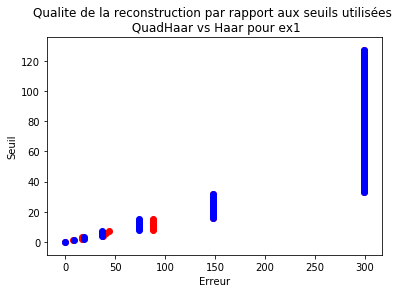

In [447]:
v1 = quadGraphe(e11)
v2 = graphe(e11)


plt.scatter(v1[:,0],v1[:,1], color="red")
plt.scatter(v2[:,0],v2[:,1], color="blue")
plt.title('Qualite de la reconstruction par rapport aux seuils utilisées \n QuadHaar vs Haar pour ex1')
plt.xlabel('Erreur')
plt.ylabel('Seuil')
plt.show()

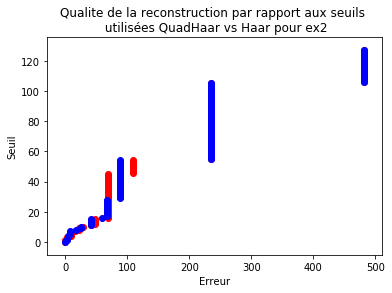

In [448]:
v1 = quadGraphe(image1)
v2 = graphe(image1)


plt.scatter(v1[:,0],v1[:,1], color="red")
plt.scatter(v2[:,0],v2[:,1], color="blue")
plt.title('Qualite de la reconstruction par rapport aux seuils \n utilisées QuadHaar vs Haar pour ex2')
plt.xlabel('Erreur')
plt.ylabel('Seuil')
plt.show()

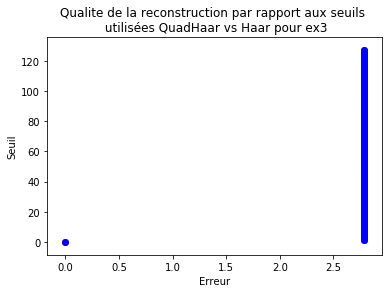

In [449]:
v1 = quadGraphe(e33)
v2 = graphe(e33)


plt.scatter(v1[:,0],v1[:,1], color="red")
plt.scatter(v2[:,0],v2[:,1], color="blue")
plt.title('Qualite de la reconstruction par rapport aux seuils \n utilisées QuadHaar vs Haar pour ex3')
plt.xlabel('Erreur')
plt.ylabel('Seuil')
plt.show()